In [18]:
!pip install pymysql

In [2]:
pip install customtkinter

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pdfplumber

   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ------- -------------------------------- 1.0/5.6 MB 7.2 MB/s eta 0:00:01
   ------- -------------------------------- 1.0/5.6 MB 7.2 MB/s eta 0:00:01
   ------------------ --------------------- 2.6/5.6 MB 4.3 MB/s eta 0:00:01
   -------------------- ------------------- 2.9/5.6 MB 4.2 MB/s eta 0:00:01
   --------------------------- ------------ 3.9/5.6 MB 4.1 MB/s eta 0:00:01
   ------------------------------- -------- 4.5/5.6 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 4.7/5.6 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 5.6/5.6 MB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ------------------ --------------------- 1.3/2.9 MB 6.1 MB/s eta 0:00:01
   --------------------- ------------------ 1.6/2.9 MB 5.6 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.9 MB 2.9 MB/s eta 0:00:01
   -----------------------

In [3]:
pip install customtkinter pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tkcalendar

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pyodbc
from tkinter import messagebox



(9, 'Item6', '220VAC', 'L&T', 'brass', Decimal('3.00'), Decimal('5.99'), Decimal('10000.00'), Decimal('30000.00'))
✅ Inventory table created successfully


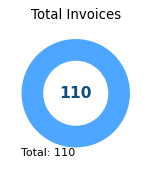

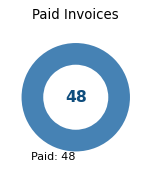

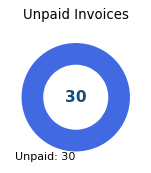

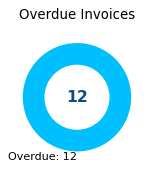

In [6]:
import customtkinter as ctk
import functools
from tkcalendar import DateEntry
from tkinter import ttk
from tkinter import *
import tkinter as tk
import pymysql
from tkinter import messagebox,filedialog
from flask import Flask, session, redirect, url_for
import pandas as pd
import tabula
import pdfplumber
import os
import html5lib
import bs4
import numpy as np
import re
import pyodbc
import sqlite3
import time
from tkinter import Frame, Label, Button, Entry, Checkbutton, IntVar, LabelFrame, messagebox, StringVar, PhotoImage
from tkinter.constants import X, BOTH, LEFT, GROOVE, RAISED, W
from tkcalendar import DateEntry
import csv
import pypyodbc as odbc
from decimal import Decimal, InvalidOperation
from PIL import Image, ImageTk
from collections import Counter
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import Toplevel
import matplotlib.pyplot as plt
from datetime import datetime


# Create the connection outside so you don't open/close repeatedly
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
    'DATABASE=version1;'
    'Trusted_Connection=yes;'
)
cursor = conn.cursor()

# Setup
ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("dark-blue")

app = ctk.CTk()
app.title("ElectroSales - Dashboard")
app.geometry("1350x700+0+0")
app.resizable(1,1)

open_windows = {}

# Sidebar
sidebar = ctk.CTkFrame(app, width=250, corner_radius=0, fg_color="#1E2A38")
sidebar.pack(side="left", fill="y")

ctk.CTkLabel(sidebar, text="Menu", font=("Arial", 21, "bold"), text_color="white").pack(pady=(20, 10))

# Top Bar
topbar = ctk.CTkFrame(app, height=50, fg_color="#141C2B")
topbar.pack(fill="x", side="top")

search = ctk.CTkEntry(topbar, placeholder_text="Search products, customers, invoices...", width=600)
search.pack(padx=20, pady=10, side="left")

# Profile (right side)
ctk.CTkLabel(topbar, text="🧑 John Smith\nAdministrator", font=("Arial", 10), anchor="e").pack(side="right", padx=20)

# Main Content
main_frame = ctk.CTkFrame(app, fg_color="#0F172A")
main_frame.pack(fill="both", expand=True, padx=15, pady=10)

top_bar = ctk.CTkFrame(main_frame, fg_color="#1E293B")
top_bar.pack(fill="x", pady=(10, 5), padx=20)

welcome_label = ctk.CTkLabel(top_bar, text="👋 Welcome Admin", font=("Arial", 20, "bold"), text_color="#F8FAFC")
welcome_label.pack(side="left", padx=20)

datetime_label = ctk.CTkLabel(top_bar, font=("Arial", 16), text_color="#CBD5E1")
datetime_label.pack(side="right", padx=20)

def update_datetime():
    current_time = time.strftime("%I:%M:%S %p")  # 12-hour format time with AM/PM
    current_date = time.strftime("%d-%m-%Y")
    datetime_label.configure(text=f"Welcome Admin\t\t Date: {current_date}\t\t Time: {current_time}")
    app.after(1000, update_datetime)  # call this function again after 1000ms (1 second)

update_datetime()  # initial call to start the clock

# Cards (Revenue, Products, Customers, Orders)
info_frame = ctk.CTkFrame(main_frame, fg_color="transparent")
info_frame.pack(fill="x", pady=(10, 0))

def open_revenue_window():
    app.lower()
    revenue_window = ctk.CTkToplevel(app)
    revenue_window.title("Total Revenue")
    revenue_window.geometry(f"{app.winfo_screenwidth()}x{app.winfo_screenheight()}")
    revenue_window.state("zoomed")
    revenue_window.configure(fg_color="#0F172A")

    revenue_window.lift()
    revenue_window.attributes("-topmost", True)
    revenue_window.focus_force()
    revenue_window.after(500, lambda: revenue_window.attributes("-topmost", False))
    revenue_window.protocol("WM_DELETE_WINDOW", lambda: [revenue_window.destroy(), app.lift()])

    ctk.CTkLabel(revenue_window, text="💰 Total Revenue", font=("Arial", 24, "bold"), text_color="white").pack(pady=40)
    ctk.CTkButton(revenue_window, text="Close", text_color="white", fg_color="#1E3A8A", hover_color="#2563EB",
                  command=lambda: [revenue_window.destroy(), app.lift()]).pack(pady=10)

def open_products_window():
    app.lower()
    products_window = ctk.CTkToplevel(app)
    products_window.title("Total Products")
    products_window.geometry(f"{app.winfo_screenwidth()}x{app.winfo_screenheight()}")
    products_window.state("zoomed")
    products_window.configure(fg_color="#0F172A")

    products_window.lift()
    products_window.attributes("-topmost", True)
    products_window.focus_force()
    products_window.after(500, lambda: products_window.attributes("-topmost", False))
    products_window.protocol("WM_DELETE_WINDOW", lambda: [products_window.destroy(), app.lift()])

    ctk.CTkLabel(products_window, text="📦 Total Products", font=("Arial", 24, "bold"), text_color="white").pack(pady=40)
    ctk.CTkButton(products_window, text="Close", text_color="white", fg_color="#1E3A8A", hover_color="#2563EB",
                  command=lambda: [products_window.destroy(), app.lift()]).pack(pady=10)

def fetch_employees():
    cursor.execute("""
        SELECT e.ID, e.Name, e.Designation, e.BasicSalary, e.PerDaySalary, e.Status,
               e.JoiningDate, e.ResigningDate, 
               s.OTDayAmount, s.OTHours, s.AdvanceTaken, s.AdvanceDeducted,
               (e.BasicSalary + (s.OTDayAmount * s.OTHours) - s.AdvanceDeducted) AS TotalSalary
        FROM Employees1 e
        JOIN EmployeeStats s ON e.ID = s.EmployeeID
    """)
    return cursor.fetchall()

# Add Employee

def add_employee_popup(parent, on_save_callback):
    popup = ctk.CTkToplevel(parent)
    popup.title("Add Employee")
    popup.geometry("400x500")
    popup.grab_set()

    # Title
    title_label = ctk.CTkLabel(popup, text="Add Employee", font=("Arial", 20, "bold"))
    title_label.pack(pady=10)

    # Name
    name_label = ctk.CTkLabel(popup, text="Name:")
    name_label.pack()
    name_entry = ctk.CTkEntry(popup)
    name_entry.pack(pady=5)

    # Designation
    designation_label = ctk.CTkLabel(popup, text="Designation:")
    designation_label.pack()
    designation_entry = ctk.CTkEntry(popup)
    designation_entry.pack(pady=5)

    # Basic Salary
    basic_salary_label = ctk.CTkLabel(popup, text="Basic Salary:")
    basic_salary_label.pack()
    basic_salary_entry = ctk.CTkEntry(popup)
    basic_salary_entry.pack(pady=5)

    # Calculate per-day salary as user types
    def update_per_day_salary(*args):
        try:
            basic = float(basic_salary_entry.get())
            per_day_salary = round(basic / 30, 2)
            per_day_salary_var.set(str(per_day_salary))
        except ValueError:
            per_day_salary_var.set("")

    basic_salary_entry.bind("<KeyRelease>", update_per_day_salary)

    # Status Dropdown
    status_label = ctk.CTkLabel(popup, text="Status:")
    status_label.pack()
    status_var = ctk.StringVar(value="Working")
    status_dropdown = ctk.CTkOptionMenu(popup, values=["Working", "Resigned"], variable=status_var)
    status_dropdown.pack(pady=5)

    # Joining Date (Date Picker)
    joining_label = ctk.CTkLabel(popup, text="Joining Date:")
    joining_label.pack()
    joining_entry = DateEntry(popup, width=18, background='darkblue', foreground='white', date_pattern='yyyy-mm-dd')
    joining_entry.pack(pady=5)

    # Save Button
    def save_employee():
        try:
            name = name_entry.get()
            designation = designation_entry.get()
            basic_salary = float(basic_salary_entry.get())
            per_day_salary = round(basic_salary / 30, 2)
            status = status_var.get()
            joining_date = joining_entry.get()

            # Insert into Employees1
            cursor.execute("""
                INSERT INTO Employees1 (Name, Designation, BasicSalary, PerDaySalary, Status, JoiningDate)
                VALUES (?, ?, ?, ?, ?, ?)
            """, (name, designation, basic_salary, per_day_salary, status, joining_date))
            connection.commit()

            # Get inserted employee ID
            cursor.execute("SELECT SCOPE_IDENTITY()")
            employee_id = cursor.fetchone()[0]

            # Insert into EmployeeStats with 0 values
            cursor.execute("""
                INSERT INTO EmployeeStats (EmployeeID, OTDayAmount, OTHours, AdvanceTaken, AdvanceDeducted, TotalSalary)
                VALUES (?, 0, 0, 0, 0, 0)
            """, (employee_id,))
            connection.commit()

            messagebox.showinfo("Success", "Employee added successfully!")
            popup.destroy()
            on_save_callback()

        except ValueError:
            messagebox.showerror("Error", "Basic Salary must be a valid number.")
        except Exception as e:
            messagebox.showerror("Database Error", str(e))

    save_btn = ctk.CTkButton(popup, text="Save", command=save_employee)
    save_btn.pack(pady=20)

def refresh_employee_data(tree, selected_status):
    try:
        tree.delete(*tree.get_children())

        query = """
            SELECT e.ID, e.Name, e.Designation, e.BasicSalary, e.PerDaySalary, 
                   e.Status, e.JoiningDate, e.ResigningDate,
                   s.OTDayAmount, s.OTHours, s.AdvanceTaken, s.AdvanceDeducted, s.TotalSalary
            FROM Employees1 e
            JOIN EmployeeStats s ON e.ID = s.EmployeeID
        """
        if selected_status != "All":
            query += " WHERE e.Status = ?"
            cursor.execute(query, (selected_status,))
        else:
            cursor.execute(query)

        rows = cursor.fetchall()

        tree.tag_configure('evenrow', background='#f9f9f9')
        tree.tag_configure('oddrow', background='#e8e8e8')
        tree.tag_configure('working', foreground='green')
        tree.tag_configure('resigned', foreground='red')

        for index, row in enumerate(rows):
            formatted = (
                str(row[0]), row[1], row[2],
                f"{row[3]:,.2f}", f"{row[4]:,.2f}",
                row[5], row[6], row[7],
                f"{row[8]:,.2f}", str(row[9]),
                f"{row[10]:,.2f}", f"{row[11]:,.2f}", f"{row[12]:,.2f}"
            )
            tag1 = 'evenrow' if index % 2 == 0 else 'oddrow'
            tag2 = 'working' if row[5] == 'Working' else 'resigned'
            tree.insert('', 'end', values=formatted, tags=(tag1, tag2))

        return rows

    except Exception as e:
        messagebox.showerror("Error", str(e))
        return []


def search_employee(tree, keyword, selected_status):
    keyword = keyword.lower().strip()
    rows = refresh_employee_data(tree, selected_status)
    tree.delete(*tree.get_children())

    for index, row in enumerate(rows):
        if keyword in row[1].lower() or keyword in row[2].lower():
            formatted = (
                str(row[0]), row[1], row[2],
                f"{row[3]:,.2f}", f"{row[4]:,.2f}",
                row[5], row[6], row[7],
                f"{row[8]:,.2f}", str(row[9]),
                f"{row[10]:,.2f}", f"{row[11]:,.2f}", f"{row[12]:,.2f}"
            )
            tag1 = 'evenrow' if index % 2 == 0 else 'oddrow'
            tag2 = 'working' if row[5] == 'Working' else 'resigned'
            tree.insert('', 'end', values=formatted, tags=(tag1, tag2))


def sort_column(tv, col, reverse):
    data = [(tv.set(k, col), k) for k in tv.get_children('')]
    try:
        data.sort(key=lambda t: float(t[0].replace(",", "")), reverse=reverse)
    except:
        data.sort(reverse=reverse)
    for index, (_, k) in enumerate(data):
        tv.move(k, '', index)
    tv.heading(col, command=lambda: sort_column(tv, col, not reverse))


def open_employee_window(parent):
    emp_win = ctk.CTkToplevel(parent)
    emp_win.title("Employee Management")
    emp_win.state('zoomed')
    emp_win.focus_force()
    emp_win.grab_set()

    ctk.CTkLabel(emp_win, text="🧑‍💼 Employee Management", font=("Arial", 28, "bold")).pack(pady=10)

    # ==== Dashboard Cards ====
    card_frame = ctk.CTkFrame(emp_win)
    card_frame.pack(fill="x", padx=20, pady=10)

    def update_dashboard(frame):
        rows = refresh_employee_data(tree, status_var.get())
        total = len(rows)
        working = sum(1 for r in rows if r[5] == "Working")
        resigned = sum(1 for r in rows if r[5] == "Resigned")
        avg_salary = sum(float(r[3]) for r in rows) / total if total else 0

        metrics = [
            ("👥 Total", total, "#3498DB"),
            ("✅ Working", working, "#2ECC71"),
            ("❌ Resigned", resigned, "#E74C3C"),
            ("💰 Avg Salary", f"{avg_salary:,.2f}", "#F1C40F")
        ]
        for w in frame.winfo_children():
            w.destroy()

        for title, val, color in metrics:
            card = ctk.CTkFrame(frame, width=160, height=80, fg_color=color)
            card.pack_propagate(False)
            card.pack(side="left", padx=10)
            ctk.CTkLabel(card, text=title, font=("Arial", 11, "bold")).pack(pady=(8, 0))
            ctk.CTkLabel(card, text=str(val), font=("Arial", 20, "bold")).pack()

    # ==== Top Controls ====
    top_frame = ctk.CTkFrame(emp_win, fg_color="transparent")
    top_frame.pack(fill="x", padx=20, pady=10)

    status_var = ctk.StringVar(value="All")
    ctk.CTkLabel(top_frame, text="Status:", font=("Arial", 12)).pack(side="left", padx=5)
    status_menu = ctk.CTkOptionMenu(top_frame, variable=status_var,
                                    values=["All", "Working", "Resigned"],
                                    command=lambda _: [refresh_employee_data(tree, status_var.get()), update_dashboard(card_frame)])
    status_menu.pack(side="left", padx=10)

    ctk.CTkButton(top_frame, text="➕ Add Employee", 
        command=lambda: add_employee_popup(emp_win, lambda: [refresh_employee_data(tree, status_var.get()), update_dashboard(card_frame)])
                 ).pack(side="left", padx=10)

    search_var = ctk.StringVar()
    ctk.CTkEntry(top_frame, width=220, placeholder_text="Search by Name/Designation", textvariable=search_var).pack(side="right", padx=10)
    ctk.CTkButton(top_frame, text="🔍", command=lambda: search_employee(tree, search_var.get(), status_var.get())).pack(side="right")

    # ==== Treeview ====
    tree_frame = ctk.CTkFrame(emp_win)
    tree_frame.pack(fill="both", expand=True, padx=20, pady=10)

    columns = ["ID", "Name", "Designation", "BasicSalary", "PerDaySalary", "Status", 
               "JoiningDate", "ResigningDate", "OTDayAmount", "OTHours", 
               "AdvanceTaken", "AdvanceDeducted", "TotalSalary"]

    tree = ttk.Treeview(tree_frame, columns=columns, show="headings", height=30)
    for col in columns:
        tree.heading(col, text=col, command=lambda _col=col: sort_column(tree, _col, False))
        tree.column(col, anchor="center", width=110)

    vsb = ttk.Scrollbar(tree_frame, orient="vertical", command=tree.yview)
    hsb = ttk.Scrollbar(tree_frame, orient="horizontal", command=tree.xview)
    tree.configure(yscrollcommand=vsb.set, xscrollcommand=hsb.set)

    vsb.pack(side="right", fill="y")
    hsb.pack(side="bottom", fill="x")
    tree.pack(fill="both", expand=True)

    refresh_employee_data(tree, status_var.get())
    update_dashboard(card_frame)


def open_orders_window():
    app.lower()
    orders_window = ctk.CTkToplevel(app)
    orders_window.title("Pending Orders")
    orders_window.geometry(f"{app.winfo_screenwidth()}x{app.winfo_screenheight()}")
    orders_window.state("zoomed")
    orders_window.configure(fg_color="#0F172A")

    orders_window.lift()
    orders_window.attributes("-topmost", True)
    orders_window.focus_force()
    orders_window.after(500, lambda: orders_window.attributes("-topmost", False))
    orders_window.protocol("WM_DELETE_WINDOW", lambda: [orders_window.destroy(), app.lift()])

    ctk.CTkLabel(orders_window, text="🛒 Pending Orders", font=("Arial", 24, "bold"), text_color="white").pack(pady=40)
    ctk.CTkButton(orders_window, text="Close", text_color="white", fg_color="#1E3A8A", hover_color="#2563EB",
                  command=lambda: [orders_window.destroy(), app.lift()]).pack(pady=10)

def open_dispatch_window():
    app.lower()
    dispatch_window = ctk.CTkToplevel(app)
    dispatch_window.title("Logistics & Dispatch")
    dispatch_window.geometry(f"{app.winfo_screenwidth()}x{app.winfo_screenheight()}")
    dispatch_window.state("zoomed")
    dispatch_window.configure(fg_color="#0F172A")

    dispatch_window.lift()
    dispatch_window.attributes("-topmost", True)
    dispatch_window.focus_force()
    dispatch_window.after(500, lambda: dispatch_window.attributes("-topmost", False))
    dispatch_window.protocol("WM_DELETE_WINDOW", lambda: [dispatch_window.destroy(), app.lift()])

    ctk.CTkLabel(dispatch_window, text="🚚 Logistics & Dispatch", font=("Arial", 24, "bold"), text_color="white").pack(pady=40)
    ctk.CTkButton(dispatch_window, text="Close", text_color="white", fg_color="#1E3A8A", hover_color="#2563EB",
                  command=lambda: [dispatch_window.destroy(), app.lift()]).pack(pady=10)
    
card_info = [
    ("💰 Total Revenue", "$124,532", "+12.5%", "#2563EB", open_revenue_window),
    ("📦 Total Products", "2,847", "+8.2%", "#22C55E", open_products_window),
    ("👥 Active Employees", "1,429", "+15.3%", "#9333EA", open_employee_window),
    ("🛒 Pending Orders", "23", "-4.2%", "#F97316", open_orders_window),
    ("🚚 Logistics & Dispatch", "5", "+2.1%", "#EF4444", open_dispatch_window)
]

for title, value, change, color, func in card_info:
    card = ctk.CTkFrame(info_frame, width=200, height=100, fg_color=color, cursor="hand2")
    card.pack_propagate(False)
    card.pack(side="left", padx=10, pady=10)

    label1 = ctk.CTkLabel(card, text=title, font=("Arial", 12, "bold"))
    label1.pack(anchor="w", padx=10, pady=(5, 0))

    label2 = ctk.CTkLabel(card, text=value, font=("Arial", 24, "bold"))
    label2.pack(anchor="w", padx=10)

    change_color = "green" if "+" in change else "red"
    label3 = ctk.CTkLabel(card, text=f"{change} vs last month", font=("Arial", 10), text_color=change_color)
    label3.pack(anchor="w", padx=10)

    # Bind cards with correct function signature
    def bind_click(widget, f=func):
        try:
            if f.__code__.co_argcount == 1:
                widget.bind("<Button-1>", lambda e: f(app))
            else:
                widget.bind("<Button-1>", lambda e: f())
        except AttributeError:
            pass  # Skip if it's not a callable (guard)

    for widget in [card, label1, label2, label3]:
        bind_click(widget)


# Sales Overview
bottom_frame = ctk.CTkFrame(main_frame, fg_color="transparent")
bottom_frame.pack(fill="both", expand=True)

sales_frame = ctk.CTkFrame(bottom_frame, fg_color="#1C1F2B")
sales_frame.pack(side="left", fill="both", expand=True, padx=10, pady=10)

ctk.CTkLabel(sales_frame, text="📊 Sales Overview", font=("Arial", 16, "bold")).pack(anchor="w", padx=10, pady=10)
months = [("Jan", 45), ("Feb", 52), ("Mar", 48), ("Apr", 61), ("May", 55), ("Jun", 67)]
for m, val in months:
    ctk.CTkLabel(sales_frame, text=f"{m} - ${val}k").pack(anchor="w", padx=20)
    bar = ctk.CTkProgressBar(sales_frame, width=200)
    bar.set(val / 100)
    bar.pack(padx=20, pady=2)

ctk.CTkLabel(sales_frame, text="Total Sales: $328,000", font=("Arial", 12, "bold")).pack(anchor="w", padx=20, pady=10)

# Inventory Status
inventory_frame = ctk.CTkFrame(bottom_frame, fg_color="#1C1F2B")
inventory_frame.pack(side="left", fill="both", expand=True, padx=10, pady=10)

ctk.CTkLabel(inventory_frame, text="📦 Inventory Status", font=("Arial", 16, "bold")).pack(anchor="w", padx=10, pady=10)

inv_data = [
    ("Smartphones", 145, 200, "#3498DB"),
    ("Laptops", 89, 120, "#2ECC71"),
    ("Tablets", 67, 80, "#9B59B6"),
    ("Accessories", 234, 300, "#E67E22"),
    ("Gaming", 45, 60, "#E74C3C")
]
for name, val, maxval, clr in inv_data:
    ctk.CTkLabel(inventory_frame, text=f"{name}: {val}/{maxval}", font=("Arial", 10)).pack(anchor="w", padx=20)
    prog = ctk.CTkProgressBar(inventory_frame, width=200, progress_color=clr)
    prog.set(val / maxval)
    prog.pack(padx=20, pady=3)

total_items = sum([val for _, val, _, _ in inv_data])
ctk.CTkLabel(inventory_frame, text=f"Total Items: {total_items}", font=("Arial", 12, "bold")).pack(anchor="w", padx=20, pady=10)


def product_form(app):
    global back_image, df, file_name, file_path
     # Create a frame for the upload buttons next to the Invoice button
    upload_frame = tk.Frame(app)
    upload_frame.place_forget()  # Initially hide it
    upload_frame.configure(bg="black")

    upload_frame_visible = False  # Define this outside the function
    
    def show_upload_buttons():
        nonlocal upload_frame_visible
    
        if not upload_frame_visible:
            # Ensure layout is up to date
            app.update_idletasks()
    
            # Position the frame beside the Invoice button
            x = invoice_button.winfo_x() + invoice_button.winfo_width()
            y = invoice_button.winfo_y() + 50
            upload_frame.place(x=x, y=y)
    
            # Clear previous widgets if any
            for widget in upload_frame.winfo_children():
                widget.destroy()
    
            # Add buttons once
            tk.Button(upload_frame, text="Upload from Files",bg='black',fg='white', font=('Arial', 12, 'bold'), command=open_invoice_window).pack(pady=5)
            tk.Button(upload_frame, text="Upload Manually", bg='black',fg='white',font=('Arial', 12, 'bold'), command=open_manual_entry_window).pack(pady=5)
    
            upload_frame_visible = True
        else:
            # If already visible, bring it to front or do nothing
            upload_frame.lift()
   
    # Now, open the Invoice fullscreen window
    def open_invoice_window():
        product_window = tk.Toplevel()
        product_window.title("Invoice")
        product_window.attributes("-fullscreen", True)
        product_window.grab_set()
    
        product_frame = tk.Frame(product_window, bg='white')
        product_frame.place(relx=0, rely=0, relwidth=1, relheight=1)
    
        heading_label = Label(product_window, text='Supplier Invoice',
                                      font=('times new roman', 18, 'bold'),
                                      bg='#0f4d7d', fg='white', anchor='w')
        heading_label.place(x=20, y=20, relwidth=0.95, height=40)
        
        top_close_button = Button(product_window, text='X', font=('Arial', 14, 'bold'),
                                          bg='red', fg='white', cursor='hand2', bd=0,
                                          command=product_window.destroy)
        top_close_button.place(relx=1.0, x=-15, y=20, anchor='ne', width=40, height=40)
        
        graph_frame=Frame(product_window,bg='white', bd=2, relief='ridge')
        graph_frame.place(x=20, y=70, width=1490, height=200) 
        
        # Create containers inside graph_frame
        paid_chart_frame = Frame(graph_frame, bg='white', width=250, height=200)
        paid_chart_frame.pack(side=LEFT, padx=30, pady=10)
        
        unpaid_chart_frame = Frame(graph_frame, bg='white', width=250, height=200)
        unpaid_chart_frame.pack(side=LEFT, padx=30, pady=10)
        
        overdue_chart_frame = Frame(graph_frame, bg='white', width=250, height=200)
        overdue_chart_frame.pack(side=LEFT, padx=30, pady=10)
        
        total_chart_frame = Frame(graph_frame, bg='white', width=300, height=200)
        total_chart_frame.pack(side=LEFT, padx=30, pady=10)
        size=[10,50,50]
        total_invoices = sum(size)
        fig2, ax2 = plt.subplots(figsize=(3, 3), dpi=80)
        ax2.pie([total_invoices], labels=[f'Total: {total_invoices}'], colors=['#4da6ff'], 
                startangle=90, wedgeprops=dict(width=0.4),
                textprops={'fontsize': 10, 'color': 'black'})
        ax2.text(0, 0, str(total_invoices), ha='center', va='center',
                 fontsize=14, weight='bold', color='#0f4d7d')
        ax2.set_title('Total Invoices', fontsize=12)
        canvas2 = FigureCanvasTkAgg(fig2, master=total_chart_frame)
        canvas2.draw()
        canvas2.get_tk_widget().pack()
        
        
        # Invoice data (replace with actual counts)
        paid_count = 48
        unpaid_count = 30
        overdue_count = 12
        
        def render_donut(frame, count, label, color, title, fontsize=12, weight='normal', pad=10):
            fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=80)
            ax.pie(
                [count],
                labels=[f'{label}: {count}'],
                colors=[color],
                startangle=90,
                wedgeprops=dict(width=0.4),
                textprops={'fontsize': 10, 'color': 'black'}
            )
            ax.text(0, 0, str(count), ha='center', va='center',
                    fontsize=14, weight='bold', color='#0f4d7d')
            ax.set_title(title, fontsize=fontsize, weight=weight, pad=pad)
            canvas = FigureCanvasTkAgg(fig, master=frame)
            canvas.draw()
            canvas.get_tk_widget().pack()
        
        # Render charts
        render_donut(paid_chart_frame, paid_count, 'Paid', 'steelblue', 'Paid Invoices')
        render_donut(unpaid_chart_frame, unpaid_count, 'Unpaid', 'royalblue', 'Unpaid Invoices')
        render_donut(overdue_chart_frame, overdue_count, 'Overdue', 'deepskyblue', 'Overdue Invoices')
        
        # Frame for buttons under graph_frame
        button_frame = Frame(product_window, bg='#1c4c74')
        button_frame.place(x=20, y=280, width=1490, height=60)  # Adjust y if graph_frame height changes
        
        left_btn_container = Frame(button_frame, bg='#1c4c74')
        left_btn_container.pack(side=LEFT, padx=20)
        
        right_btn_container = Frame(button_frame, bg='#1c4c74')
        right_btn_container.pack(side=RIGHT, padx=20)


        def refresh_invoice_dashboard():
            try:
                query = "SELECT * FROM IMT"
                df = pd.read_sql(query,conn)
        
                print(f"[INFO] Refreshed invoice data: {len(df)} rows loaded.")
                return df
        
            except Exception as e:
                print(f"[ERROR] Refresh failed: {e}")
                return None
                
        refresh_btn = Button(left_btn_container, text='🔄',
                             font=('Arial', 14, 'bold'),
                             bg='#17a2b8', fg='white',
                             cursor='hand2',
                             width=4, height=1,
                             command=refresh_invoice_dashboard)
        refresh_btn.grid(row=0, column=0, padx=16, pady=8)
        
        download_btn = Button(left_btn_container, text='📥', font=('Arial', 14, 'bold'), bg='green', fg='white',
                              cursor='hand2', width=4, height=1,anchor='center')
        download_btn.grid(row=0, column=2, padx=16, pady=8)
        
        search_combobox = ttk.Combobox(right_btn_container,
                                               values=('HTML', 'Excel', 'CSV', 'TXT', 'PDF'),
                                               state='readonly', font=('times new roman', 14),width=20)
        search_combobox.grid(row=0, column=2, padx=5, pady=10, sticky='ew')
        search_combobox.set("Select File Type")
        pay_combobox = ttk.Combobox(right_btn_container,
                                               values=('Paid', 'Unpaid', 'Overdue'),
                                               state='readonly', font=('times new roman', 14),width=20)
        pay_combobox.grid(row=0, column=3, padx=5, pady=10, sticky='ew')
        pay_combobox.set("Payment Type")
                
        
        output_frame = Frame(product_window, bg='white')
        output_frame.place(x=60, y=350, width=1500, height=410)
        
        # Add scrollbars
        x_scroll = Scrollbar(output_frame, orient=HORIZONTAL)
        y_scroll = Scrollbar(output_frame, orient=VERTICAL)
        
        output_text = Text(
            output_frame, 
            bg='white', 
            font=('Consolas', 10), 
            wrap='none',
            xscrollcommand=x_scroll.set,
            yscrollcommand=y_scroll.set
        )
        output_text.pack(side=LEFT, fill=BOTH, expand=True)
        
        x_scroll.config(command=output_text.xview)
        y_scroll.config(command=output_text.yview)
        
        x_scroll.pack(side=BOTTOM, fill=X)
        y_scroll.pack(side=RIGHT, fill=Y)
                
        class HoverTooltip:
            def __init__(self, widget, text, x_offset=0, y_offset=-30):
                self.widget = widget
                self.text = text
                self.tooltip = None
                self.x_offset = x_offset
                self.y_offset = y_offset
                widget.bind("<Enter>", self.display_tooltip)
                widget.bind("<Leave>", self.remove_tooltip)
        
            def display_tooltip(self, event=None):
                if self.tooltip or not self.text:
                    return
                x = self.widget.winfo_rootx() + self.x_offset
                y = self.widget.winfo_rooty() + self.y_offset
                self.tooltip = tk.Toplevel(self.widget)
                self.tooltip.overrideredirect(True)
                self.tooltip.geometry(f"+{x}+{y}")
                label = tk.Label(self.tooltip, text=self.text, bg="#333", fg="white",
                                 font=("Arial", 10), bd=1, relief="solid", padx=6, pady=3)
                label.pack()
        
            def remove_tooltip(self, event=None):
                if self.tooltip:
                    self.tooltip.destroy()
                    self.tooltip = None
        HoverTooltip(download_btn, "Download the selected invoice")
        HoverTooltip(refresh_btn, "Refresh the invoice dashboard view")
    
        file_types = {
            "HTML": (".html", pd.read_html),
            "Excel": (".xlsx", pd.read_excel),
            "CSV": (".csv", pd.read_csv),
            "TXT": (".txt", pd.read_csv),
            "PDF": (".pdf", None),
        }
    
        def pdf_to_excel(file_path, output_excel_path):
            with pdfplumber.open(file_path) as pdf:
                all_tables = []
                for page in pdf.pages:
                    tables = page.extract_tables()
                    for table in tables:
                        if table and len(table) > 1:
                            df = pd.DataFrame(table[1:], columns=table[0])
                            all_tables.append(df)
                    try:
                        df = pd.DataFrame(table[1:], columns=table[0])
                    except Exception:
                        # Fallback if header row is malformed
                        df = pd.DataFrame(table)
                    all_tables.append(df)
    
        def analyze_pdf_bill(file_path):
            global text
            with pdfplumber.open(file_path) as pdf:
                all_text = ""
                tables = []
                
                for page_num, page in enumerate(pdf.pages):
                    text = page.extract_text()
                    if text:
                        print(f"\n--- Page {page_num + 1} Text ---")
                        print(text)
                        all_text += text + "\n"
                    
                    # Extract any tables found on the page
                    page_tables = page.extract_tables()
                    for table in page_tables:
                        df = pd.DataFrame(table[1:], columns=table[0])  # Use first row as header
                        print(f"\n--- Page {page_num + 1} Table ---")
                        print(df)
                        tables.append(df)
                        
                if not tables:
                    print(f"No tables found on page {page_num + 1}")
            
                return all_text, tables
    
        def extract_metadata(text):
            invoice_no = re.search(r"Invoice\s*No[:\-]?\s*(\w+)", text)
            total_amt = re.search(r"Total\s*Amount[:\-]?\s*(\d+\.\d{2})", text)
            return {
                "invoice_no": invoice_no.group(1) if invoice_no else None,
                "total_amt": total_amt.group(1) if total_amt else None,
            }
        
        def clean_dataframe(df):
            try:
                df.dropna(how='all', inplace=True)
                df.fillna(value=0, inplace=True)
                for col in df.select_dtypes(include=['object']):
                    df[col] = df[col].str.strip()
                for col in df.columns:
                    try:
                        df[col] = pd.to_numeric(df[col])
                    except:
                        continue
                df.drop_duplicates(inplace=True)
                return df
            except Exception as e:
                print(f"An error occurred during cleaning: {e}")
                return None
    
    
    
        def load_file_any_type(file_path):
            ext = os.path.splitext(file_path)[-1].lower()
            tables = []
            all_text = ""
        
            try:
                if ext in ['.csv']:
                    df = pd.read_csv(file_path)
                    tables.append(df)
                    all_text = df.to_string()
        
                elif ext in ['.xls', '.xlsx']:
                    df = pd.read_excel(file_path)
                    tables.append(df)
                    all_text = df.to_string()
        
                elif ext in ['.txt']:
                    with open(file_path, 'r', encoding='utf-8') as f:
                        all_text = f.read()
                        # Optional: try extracting tabular data from structured TXT
                        tables = try_parse_text_table(all_text)
        
                elif ext in ['.html']:
                    dfs = pd.read_html(file_path)
                    tables.extend(dfs)
                    all_text = "\n\n".join([df.to_string() for df in dfs])
        
                elif ext in ['.pdf']:
                    with pdfplumber.open(file_path) as pdf:
                        for page_num, page in enumerate(pdf.pages):
                            text = page.extract_text()
                            if text:
                                all_text += f"\n--- Page {page_num + 1} ---\n{text}"
                            page_tables = page.extract_tables()
                            for table in page_tables:
                                df = pd.DataFrame(table[1:], columns=table[0])
                                tables.append(df)
        
                else:
                    raise ValueError("Unsupported file type")
        
                return all_text.strip(), tables
        
            except Exception as e:
                print(f"Error loading file: {e}")
                return "", []
                
        def load_file(event=None):
            global df, file_name, file_path
            file_type = search_combobox.get()
            if file_type not in file_types:
                messagebox.showerror("Error", "Unsupported file type selected.")
                return
        
            ext, _ = file_types[file_type]
            file_path = filedialog.askopenfilename(
                title="Select a file", filetypes=[(f"{file_type} files", f"*{ext}")]
            )
            if not file_path:
                messagebox.showwarning("No file", "No file was selected.")
                return
        
            file_name = os.path.basename(file_path)
            entry_var.set(file_name)
        
            try:
                # Unified loader
                text, tables = load_file_any_type(file_path)
        
                if not tables:
                    messagebox.showwarning("No Table", "No tabular data found in this file.")
                    output_text.delete("1.0", tk.END)
                    output_text.insert(tk.END, f"Text from file:\n{text[:2000]}\n...\n")
                    return
        
                df = clean_dataframe(tables[0])  # Use first detected table
        
                output_text.delete("1.0", tk.END)
                output_text.insert(tk.END, f"Loaded {file_name} ({len(df)} rows):\n\n")
                output_text.insert(tk.END, df.head().to_string(index=False))
        
            except Exception as e:
                messagebox.showerror("Read Error", f"Could not read file:\n{e}")
                
        global df, file_name, file_path

        def add_file_to_sql():
            if df is None or df.empty:
                messagebox.showwarning("No Data", "Please load a valid file with data first.")
                return
        
            try:
                conn = pyodbc.connect(
                    'DRIVER={ODBC Driver 17 for SQL Server};'
                    'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
                    'DATABASE=version1;'
                    'Trusted_Connection=yes;'
                )
                cursor = conn.cursor()

                # Create table if not exists
                cursor.execute("""
                    IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Inventory' AND xtype='U')
                    CREATE TABLE Inventory(
                       cat_num INT PRIMARY KEY,
                       description NVARCHAR(50),
                       ratings NVARCHAR(50),
                       make VARCHAR(50),
                       material_name VARCHAR(50),
                       total_qty DECIMAL(10,2),
                       discount DECIMAL(10,2),
                       list_price DECIMAL(10,2),
                       total DECIMAL(10,2)
                    );
                """)
                conn.commit()
                # Connect to history DB
                history_conn = pyodbc.connect(
                    'DRIVER={ODBC Driver 17 for SQL Server};'
                    'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
                    'DATABASE=History;'
                    'Trusted_Connection=yes;'
                )
                history_cursor = history_conn.cursor()

                # Create history table if not exists
                history_cursor.execute("""
                    IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Inventory_History' AND xtype='U')
                    CREATE TABLE Inventory_History (
                       cat_num INT PRIMARY KEY,
                       description NVARCHAR(50),
                       ratings NVARCHAR(50),
                       make VARCHAR(50),
                       material_name VARCHAR(50),
                       DateAdded DATETIME DEFAULT GETDATE(),  
                       total_qty DECIMAL(10,2),
                       discount DECIMAL(10,2),
                       list_price DECIMAL(10,2),
                       total DECIMAL(10,2)
                    );
                """)
                history_conn.commit()
                
                inserted = 0
                updated = 0
        
                for _, row in df.iterrows():
                    try:
                        description= str(row.get('description', '')).strip()
                        ratings= str(row.get('ratings', '')).strip()
                        cat_num= str(row.get('cat_num', '')).strip()
                        make = str(row.get('make', '')).strip()
                        name = str(row.get('material_name', '')).strip()
                        total_qty = Decimal(row.get('total_qty', 0))
                        discount = Decimal(row.get('discount', 0))
                        rate = Decimal(row.get('list_price', 0))
                       # total = Decimal(row.get('total', 0))
                        
        
                        # Check if a matching row already exists
                        cursor.execute("""
                            SELECT total_qty, discount FROM Inventory
                            WHERE make = ? AND material_name = ? AND list_price = ?
                        """, (make, name, rate))
                        existing = cursor.fetchone()
        
                        if existing:
                            # Row exists, update by adding new quantity and discount
                            existing_qty, existing_discount = existing
                            new_total_qty = existing_qty + total_qty
                            new_discount = existing_discount + discount
                            new_total = round(new_total_qty * rate, 2)
        
                            cursor.execute("""
                                UPDATE Inventory
                                SET total_qty = ?, discount = ?, total = ?
                                WHERE make = ? AND material_name = ? AND list_price = ? 
                            """, (new_total_qty, new_discount, new_total, make, name, rate))
                            updated += 1
                        else:
                            # Insert new row
                            total = round(total_qty * rate, 2)
                            cursor.execute("""
                                INSERT INTO Inventory (description,ratings,cat_num, make, material_name,total_qty, discount, list_price, total)
                                VALUES ( ?, ?, ?, ?, ?,?,?,?,?)
                            """, (description,ratings,cat_num, make, name, total_qty, discount, rate, total))
                            inserted += 1
        
                    except Exception as row_e:
                        print(f"Row processing failed: {row_e}")
        
                conn.commit()
                history_conn.commit()
                messagebox.showinfo("Success", f"{inserted} row(s) inserted, {updated} row(s) updated in SQL.")
        
            except Exception as e:
                messagebox.showerror("Database Error", f"Failed to insert/update data:\n{e}")
        
            finally:
                if 'conn' in locals():
                    conn.close()
                if 'history_conn' in locals():
                    history_conn.close()
        def load_imt_history():
            try:
                history_conn = pyodbc.connect(
                    'DRIVER={ODBC Driver 17 for SQL Server};'
                    'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
                    'DATABASE=History;'
                    'Trusted_Connection=yes;'                )
        
                # Load table via pandas
                df = pd.read_sql("SELECT * FROM Inventory_History ORDER BY DateAdded DESC", history_conn)
        
                # Clear existing content in Text widget
                output_text.delete('1.0', 'end')
        
                # Define column widths for uniform layout
                col_widths = [18] * len(df.columns)  # you can customize per column if needed
        
                # Format header row
                headers = "".join([f"{col:<{col_widths[i]}}" for i, col in enumerate(df.columns)])
                output_text.insert('end', headers + "\n")
                output_text.insert('end', "-" * len(headers) + "\n")
        
                # Format each data row
                for _, row in df.iterrows():
                    row_data = "".join([f"{str(row[i]):<{col_widths[i]}}" for i in range(len(row))])
                    output_text.insert('end', row_data + "\n")
        
                history_conn.close()
        
            except Exception as e:
                output_text.delete('1.0', 'end')
                output_text.insert('end', f"Error loading data:\n{e}")

 
        search_combobox.bind("<<ComboboxSelected>>", load_file)
        entry_var = tk.StringVar()
        file_id_var = StringVar()
        add_btn = Button(left_btn_container, text='Add',
                             font=('Arial', 14, 'bold'),
                             bg='#17a2b8', fg='white',
                             cursor='hand2',
                             width=4, height=1,
                             command=lambda:  add_file_to_sql())
        add_btn.grid(row=0, column=3, padx=16, pady=8)
        HoverTooltip(add_btn, "Import invoice data from file to database")

        search_var = StringVar()
        search_entry = Entry(right_btn_container, textvariable=entry_var,
                             font=('Arial', 13), width=25, relief='groove')
        search_entry.grid(row=0, column=1, padx=14, pady=10)
        search_btn = Button(right_btn_container, text='Search',
                            font=('Arial', 13, 'bold'),
                            bg='#17a2b8', fg='white',
                            cursor='hand2',
                            width=10, height=2)
        search_btn.grid(row=0, column=4, padx=6, pady=6, sticky='ew')
        
        invoice_btn = Button(left_btn_container, text='Invoice',
                            font=('Arial', 14, 'bold'),
                            bg='#17a2b8', fg='white',
                            cursor='hand2',
                            width=7, height=1,command=load_imt_history)  
        invoice_btn.grid(row=0, column=4, padx=16, pady=8)
        HoverTooltip(invoice_btn, "view all the invoices")
     
        def delete_selected_row_and_db():
            try:
                # Use cursor position to identify the line
                cursor_index = output_text.index(tk.INSERT)
                line_number = cursor_index.split('.')[0]
                selected_text = output_text.get(f"{line_number}.0", f"{int(line_number) + 1}.0").strip()
        
                print(f"Raw selected text: {repr(selected_text)}")
        
                # Split by whitespace (handles space-aligned columns)
                parts = selected_text.split()
                print(f"Parsed parts: {parts}")
        
                if len(parts) < 4:
                    messagebox.showerror(
                        "Invalid Selection",
                        f"Expected at least 4 fields (space-separated), got only {len(parts)}.\n\nLine: {selected_text}"
                    )
                    return
        
                # Adjust this index to match the actual location of cat_num
                cat_num_str = parts[3]  # Assuming 4th column is cat_num
        
                if not cat_num_str.isdigit():
                    messagebox.showerror("Parsing Error", f"Expected integer cat_num, got: '{cat_num_str}'")
                    return
        
                cat_num = int(cat_num_str)
        
                # Delete line from the Text widget
                output_text.delete(f"{line_number}.0", f"{int(line_number) + 1}.0")
        
                # Connect to the SQL Server and delete row from IMT_History
                history_conn = pyodbc.connect(
                    'DRIVER={ODBC Driver 17 for SQL Server};'
                    'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
                    'DATABASE=History;'
                    'Trusted_Connection=yes;'                )
                cursor = history_conn.cursor()
                cursor.execute("DELETE FROM Inventory_History WHERE cat_num = ?", (cat_num,))
                affected = cursor.rowcount
                history_conn.commit()
                history_conn.close()
        
                messagebox.showinfo("Deleted", f"{affected} row(s) removed from IMT_History and display.")
        
            except tk.TclError:
                messagebox.showwarning("Selection Needed", "Please click on a valid row or select a full line.")
            except Exception as e:
                messagebox.showerror("Error", f"Deletion failed:\n{e}")

        delete_btn = Button(left_btn_container, text='🚫',
                            font=('Arial', 14, 'bold'),
                            bg='red', fg='white',
                            cursor='hand2',
                            width=4, height=1,
                            command=delete_selected_row_and_db) 
        
        delete_btn.grid(row=0, column=1, padx=16, pady=8)
        HoverTooltip(delete_btn, "Delete the selected invoice from database and dashboard")

    def open_manual_entry_window():
        manual_window = tk.Toplevel(app)
        manual_window.title("Invoice")
        manual_window.attributes("-fullscreen", True)
        manual_window.grab_set()
    
        manual_frame = tk.Frame(manual_window, bg='white')
        manual_frame.place(relx=0, rely=0, relwidth=1, relheight=1)
    
        top_close_button = Button(manual_window, text='X', font=('Arial', 14, 'bold'),
                                  bg='red', fg='white', cursor='hand2', bd=0,
                                  command=manual_window.destroy)
        top_close_button.place(relx=1.0, x=-15, y=20, anchor='ne', width=40, height=40)
    
        heading_label = Label(manual_frame, text='Get Inventory Files Manually',
                              font=('times new roman', 18, 'bold'),
                              bg='#0f4d7d', fg='white', anchor='w')
        heading_label.place(x=20, y=20, relwidth=0.95, height=40)
     # Define Table Headers
        headers = [
            "DESCRIPTION", "RATINGS", "CAT NO.", "MAKE","MATERIAL_NAME",
            "TOTAL_QTY", "LIST_PRICE", "DISCOUNT","TOTAL"]
        
        style = ttk.Style()
        style.configure("Custom.Treeview.Heading", font=("Arial", 12, "bold"))
        # Create Treeview Table
        inventory_table = ttk.Treeview(manual_frame, columns=headers, show="headings", style="Custom.Treeview")
    
        # Set Column Headings
        for col in headers :
            inventory_table.heading(col, text=col)
            inventory_table.column(col, width=120,anchor="center")  # Adjust width as needed
    
        inventory_table.place(x=20, y=80, relwidth=0.95, height=500)
                # Function to Add Data to Table
        def add_to_table():
            values = [
                description_entry.get(),
                ratings_entry.get(),
                cat_num_entry.get(),
                make_entry.get(),
                material_name.get(),
                total_qty_entry.get(),
                list_price_entry.get(),
                discount_entry.get(),
               # disc_unit_price_entry.get(),
                #disc_gross_price_entry.get()
            ]
            inventory_table.insert("", "end", values=values)
            values = [entries[label].get() for label in headers]

  
         # Create Treeview Table
        inventory_table = ttk.Treeview(manual_frame, columns=headers, show="headings")
    
        # Set Column Headings
        for col in headers:
            inventory_table.heading(col, text=col)
            inventory_table.column(col, width=100)
    
        inventory_table.place(x=20, y=80, relwidth=0.95, height=550)
        def calculate_total():
            for row_id in inventory_table.get_children():
                values = list(inventory_table.item(row_id, "values"))
        
                # Skip rows with missing columns
                if len(values) < 9:
                    values += [''] * (9 - len(values))  # pad missing columns
        
                try:
                    total_qty = float(values[5])         # TOTAL_QTY
                    list_price = float(values[6])        # LIST_PRICE
                    discount = float(values[7])          # DISCOUNT
        
                    discounted_price = list_price * (1 - discount / 100)
                    total = total_qty * discounted_price
        
                    values[8] = f"{total:.2f}"            # TOTAL column
                    inventory_table.item(row_id, values=values)
        
                except Exception as e:
                    print(f"Error calculating total for row {row_id}: {e}")
      
        add_row_button = tk.Button(manual_frame, text="CALCULATE", font=("Arial", 12),
                                               command=calculate_total, bg="#0f4d7d", fg="white")
        add_row_button.place(x=400, y=800)
       
        # Entry Fields for Manual Input (Placed at Bottom, 3 Per Row)
        entry_labels = [label for label in headers if label != "TOTAL"]
        entries={}
        entries_list = []  # Maintain order for navigation
        
        for i, label in enumerate(entry_labels):
            row = i // 3
            col = i % 3
            tk.Label(manual_frame, text=label, font=("Arial", 12)).place(relx=0.05 + col * 0.3, rely=0.75 + row * 0.05)
            
            entry = tk.Entry(manual_frame, width=20)
            entry.place(relx=0.15 + col * 0.3, rely=0.75 + row * 0.05)
            entries[label] = entry
            entries_list.append(entry)

       # Bind Enter to move focus to next entry
        for i, entry in enumerate(entries_list):
            def focus_next(event, idx=i):
                if idx + 1 < len(entries_list):
                    entries_list[idx + 1].focus_set()
                return "break"  # Prevent default behavior
        
            entry.bind("<Return>", focus_next)
         

        # Add Button to Insert Data into Table
        tk.Button(manual_frame, text="Add to Table",font=("Arial",12),bg="#0f4d7d", fg="white", command=lambda: inventory_table.insert("", "end", values=[entries[label].get() for label in headers if label !='TOTAL'])).place(x=600, y=800)
        
        def delete_selected_row():
            selected_item = inventory_table.selection()
            if selected_item:
                inventory_table.delete(selected_item)
            else:
                messagebox.showwarning("No selection", "Please select a row to delete.")
    
        tk.Button(manual_frame, text="Delete", font=("Arial", 12), bg="#8B0000", fg="white",
          command=delete_selected_row).place(x=800, y=800)
        
        def add_manual_file_to_sql():
            rows = inventory_table.get_children()
            if not rows:
                messagebox.showwarning("No Data", "No entries found in the table.")
                return
        
            try:
                # Connect to live inventory DB
                conn = pyodbc.connect(
                    'DRIVER={ODBC Driver 17 for SQL Server};'
                    'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
                    'DATABASE=version1;'
                    'Trusted_Connection=yes;'              )
                cursor = conn.cursor()
                
                # Ensure table exists
                cursor.execute("""
                    IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Inventory' AND xtype='U')
                    CREATE TABLE Inventory (
                        cat_num INT PRIMARY KEY,
                        description NVARCHAR(50),
                        ratings NVARCHAR(50),
                        make VARCHAR(50),
                        material_name VARCHAR(50),
                        total_qty DECIMAL(10,2),
                        discount DECIMAL(10,2),
                        list_price DECIMAL(10,2),
                        total DECIMAL(10,2)
                    );
                """)
                conn.commit()        
                # Connect to history DB
                history_conn = pyodbc.connect(
                    'DRIVER={ODBC Driver 17 for SQL Server};'
                    'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
                    'DATABASE=History;'
                    'Trusted_Connection=yes;'                )
                history_cursor = history_conn.cursor()

                # Create history table if not exists
                history_cursor.execute("""
                    IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Inventory_History' AND xtype='U')
                    CREATE TABLE Inventory_History (
                        cat_num INT PRIMARY KEY,
                        description NVARCHAR(50),
                        ratings NVARCHAR(50),
                        make VARCHAR(50),
                        material_name VARCHAR(50),
                        DateAdded DATETIME DEFAULT GETDATE(),
                        total_qty DECIMAL(10,2),
                        discount DECIMAL(10,2),
                        list_price DECIMAL(10,2),
                        total DECIMAL(10,2)
                    );
                """)
                history_conn.commit()
        
                inserted, updated = 0, 0
        
                for row_id in rows:
                    values = inventory_table.item(row_id, "values")
                    if not values or len(values) < 9:
                        continue
        
                    try:
                        # Sanitize and parse fields
                        cat_num_raw = str(values[2]).strip()
                        if not cat_num_raw.isdigit():
                            raise ValueError(f"Invalid CAT NO.: {cat_num_raw}")
                        cat_num = int(cat_num_raw)
        
                        description = str(values[0]).strip()
                        ratings = str(values[1]).strip()
                        make = str(values[3]).strip()
                        material_name = str(values[4]).strip()
                        total_qty = Decimal(str(values[5]))
                        rate = Decimal(str(values[6]))
                        discount = Decimal(str(values[7]))
                        total = round(total_qty * rate, 2)
      
                        # Check for existing row
                        cursor.execute("""
                            SELECT total_qty, discount FROM Inventory
                            WHERE make = ? AND material_name = ? AND list_price = ?
                        """, (make, material_name, rate))
                        existing = cursor.fetchone()
        
                        if existing:
                            # Update live table
                            ex_total_qty, ex_discount = existing
                            new_total_qty = ex_total_qty + total_qty
                            new_discount = ex_discount + discount
                            new_total = round(new_total_qty * rate, 2)
        
                            cursor.execute("""
                                UPDATE Inventory
                                SET total_qty = ?, discount = ?, total = ?
                                WHERE make = ? AND material_name = ? AND list_price = ?
                            """, (new_total_qty, new_discount, new_total, make, material_name, rate))
                            updated += 1
                            action_type = "UPDATE"
                        else:
                            # Insert into live table
                            cursor.execute("""
                                INSERT INTO Inventory (cat_num, description, ratings, make, material_name, total_qty, discount, list_price, total)
                                VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
                            """, (cat_num, description, ratings, make, material_name, total_qty, discount, rate, total))
                            inserted += 1
                            action_type = "INSERT"
                    # ✔ Corrected Insert for Inventory_History
                        history_cursor.execute("""
                            INSERT INTO IMT_History (
                                description, ratings, cat_num, make, material_name,
                                DateAdded, total_qty, discount, list_price, total
                                )

                            VALUES (?, ?, ?, ?,?, ?, ?, ?, ?, ?)
                        """, (cat_num, description, ratings, make, material_name,DateAdded, total_qty, discount, rate, total))

                    except Exception as row_err:
                        print(f"Skipping row {row_id} due to error: {row_err}")
        
                conn.commit()
                history_conn.commit()
                messagebox.showinfo("Upload Complete", f"{inserted} inserted, {updated} updated.")
        
            except Exception as e:
                messagebox.showerror("Database Error", str(e))
                if 'conn' in locals(): conn.rollback()
                if 'history_conn' in locals(): history_conn.rollback()
        
            finally:
                if 'conn' in locals(): conn.close()
                if 'history_conn' in locals(): history_conn.close()
 
        tk.Button(manual_frame, text="Add to Inventory", font=("Arial", 12), bg="#228B22", fg="white",
                  command=add_manual_file_to_sql).place(x=1200, y=800)
        
    invoice_button.config(command=show_upload_buttons)
    
def inventory_form(app):
    global back_image
    inventory_window = tk.Toplevel()
    inventory_window.title("Inventory")

    # Make it full screen
    inventory_window.attributes("-fullscreen", True)

    # Make it modal (block other windows)
    inventory_window.grab_set()

    # Optional: add a button to close the window
    exit_button = ttk.Button(inventory_window, text="Close", command=inventory_window.destroy)
    exit_button.pack(pady=10)
    
    # Inventory Frame (full width and height)
    inventory_frame = Frame(inventory_window, bg='white')
    inventory_frame.place(relx=0, rely=0, relwidth=1, relheight=1)
    
    # Heading label
    heading_label = Label(inventory_frame, text='Manage Inventory Details',
                          font=('times new roman', 18, 'bold'),
                          bg='#0f4d7d', fg='white', anchor='w')
    heading_label.place(x=20, y=20, relwidth=0.95, height=40)
    
    conn = pyodbc.connect(
        'DRIVER={ODBC Driver 17 for SQL Server};'
        'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
        'DATABASE=version1;'
        'Trusted_Connection=yes;'
    )
    cursor = conn.cursor()
    cursor.execute("SELECT TOP 1 * FROM Inventory")
    print(cursor.fetchone())
    conn.close()
    
    def create_inventory_table():
        conn = pyodbc.connect(
        'DRIVER={ODBC Driver 17 for SQL Server};'
        'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
        'DATABASE=version1;'
        'Trusted_Connection=yes;'
        )
        cursor = conn.cursor()
    
        cursor.execute("""
            IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Inventory' AND xtype='U')
            CREATE TABLE Inventory (
               cat_num INT PRIMARY KEY,
               description NVARCHAR(50),
               ratings NVARCHAR(50),
               make VARCHAR(50),
               material_name VARCHAR(50),
               total_qty DECIMAL(10,2),
               discount DECIMAL(10,2),
               list_price DECIMAL(10,2),
               total DECIMAL(10,2)
            );
        """)
        conn.commit()
        print("✅ Inventory table created successfully")
    
        conn.close()
    
    # Call it directly
    create_inventory_table()
    
        # Utility Functions
    def clean_dataframe(df):
        try:
            df.dropna(how='all', inplace=True)
            df.fillna(value=0, inplace=True)
            for col in df.select_dtypes(include=['object']):
                df[col] = df[col].str.strip()
            df.drop_duplicates(inplace=True)
            return df
        except Exception as e:
            print(f"An error occurred during cleaning: {e}")
            return None 
    
    def merge_and_update_inventory(df_new, conn_str):
        conn = pyodbc.connect(conn_str)
        cursor = conn.cursor()
        df_existing = pd.read_sql("SELECT * FROM Inventory", conn)
    
        for _, new_row in df_new.iterrows():
            description= new_row['description']
            ratings=new_row['ratings']
            cat_num=new_row['cat_num']
            make = new_row['make']
            material_name = new_row['material_name']
            new_total_qty = new_row['total_qty']
            rate_per_pannel = new_row['list_price']
            new_discount = new_row['discount']
    
            # Find a matching row
            match = df_existing[
                (df_existing['make'] == make) &
                (df_existing['material_name'] == material_name) &
                (df_existing['list_price'] == list_price)
            ]
    
            if not match.empty:
                # Match found - update quantity and discount
                existing_row = match.iloc[0]
                new_net_total_qty = existing_row['total_qty'] + new_total_qty
                new_total_discount = existing_row['discount'] + new_discount
    
                update_query = """
                    UPDATE Inventory
                    SET total_qty = ?, discount = ?
                    WHERE id = ?
                """
                cursor.execute(update_query, new_net_total_qty, new_total_discount, existing_row['id'])
    
            else:
                # No match - insert new row
                insert_query = """
                    INSERT INTO Inventory (description,ratings,cat_num,make, material_name, list_price, total_qty, discount)
                    VALUES (?, ?, ?, ?, ?,?,?,?)
                """
                cursor.execute(insert_query, description, ratings, cat_num, make, material_name, list_price, new_total_qty, new_discount)
    
        conn.commit()
        cursor.close()
        conn.close()
        print("Inventory merge and update complete.")

    def load_inventory_to_treeview(treeview):
        conn = pyodbc.connect(
         'DRIVER={ODBC Driver 17 for SQL Server};'
        'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
        'DATABASE=version1;'
        'Trusted_Connection=yes;'
        )
        cursor=conn.cursor()
        columns = ["cat_num","description","ratings", "make", "material_name","total_qty", "discount", "list_price", "total"]
        df = pd.read_sql("SELECT * FROM Inventory", conn) 
    
        # Clear Treeview
        for item in treeview.get_children():
            treeview.delete(item)
    
        # Configure columns
        treeview["columns"] = columns
        treeview["show"] = "headings"
        for col in columns:
            treeview.heading(col, text=col)
            treeview.column(col, anchor="center", width=150)
    
        # Insert rows
        for _, row in df.iterrows():
            treeview.insert('', 'end', values=list(row))
    
        conn.close()

    def search_inventory():
        field = search_combobox.get()
        value = search_entry.get().strip()
    
        if field not in ('Make', 'Material name') or not value:
            print("Please select a valid field and enter search text.")
            return None
    
        column = 'make' if field == 'Make' else 'material_name'
    
        conn = pyodbc.connect(
            'DRIVER={ODBC Driver 17 for SQL Server};'
            'SERVER=PRATIKSHARAUT\\SQLEXPRESS;'
            'DATABASE=version1;'
            'Trusted_Connection=yes;'
        )
        query = f"""
            SELECT description,ratings, cat_num ,make, material_name, total_qty, discount, list_price, total
            FROM Inventory
            WHERE {column} LIKE ?
        """
        df_results = pd.read_sql_query(query, conn, params=(value + '%',))
        conn.close()
    
        # Update Treeview
        treeview.delete(*treeview.get_children())
        treeview["columns"] = df_results.columns.tolist()
        treeview["show"] = "headings"
    
        for col in df_results.columns:
            treeview.heading(col, text=col)
            treeview.column(col, anchor='center')
    
        for _, row in df_results.iterrows():
            treeview.insert('', 'end', values=list(row))
    
        # Return DataFrame if needed later
        return df_results

        # Search Frame
    search_frame = LabelFrame(inventory_frame, text='Search Product',
                              font=('times new roman', 14), padx=10, pady=10)
    search_frame.place(relx=0.05, rely=0.12, relwidth=0.9, height=80)

     # Grid configuration for uniform spacing
    for i in range(7):
        search_frame.columnconfigure(i, weight=1)
    
    search_combobox = ttk.Combobox(search_frame, values=('Make', 'Material name'),
                                    state='readonly', width=16, font=('times new roman', 14))
    search_combobox.grid(row=0, column=0, padx=5, sticky='ew')
    search_combobox.set('Search By')
    
    search_entry = Entry(search_frame, font=('times new roman', 14, 'bold'),
                         bg='lightyellow')
    search_entry.grid(row=0, column=1, padx=5, sticky='ew')
    
    search_button = Button(search_frame, text='Search', font=('times new roman', 14),
                           cursor='hand2', fg='white', bg='#0f4d7d', command=search_inventory)
    search_button.grid(row=0, column=2, padx=5, sticky='ew')
    
    show_button = Button(search_frame, text='Show All', font=('times new roman', 14),
                         cursor='hand2', fg='white', bg='#0f4d7d',
                         command=lambda: load_inventory_to_treeview(treeview))
    show_button.grid(row=0, column=3, padx=5, sticky='ew')


    # Close button at top-right
    top_close_button = Button(inventory_window, text='X', font=('Arial', 14, 'bold'),
                              bg='red', fg='white', cursor='hand2', bd=0,
                              command=inventory_window.destroy)
    top_close_button.place(relx=1.0, x=-15, y=19, anchor='ne', width=40, height=40)
    
    # Treeview Frame
    treeview_frame = Frame(inventory_frame, bg='grey')
    treeview_frame.place(relx=0.05, rely=0.25, relwidth=0.9, relheight=0.65)
    
    # Treeview + Scrollbars
    scrolly = Scrollbar(treeview_frame, orient=VERTICAL)
    scrollx = Scrollbar(treeview_frame, orient=HORIZONTAL)
    
    treeview = ttk.Treeview(treeview_frame,
                            columns=('cat_num','description','ratings', 'make', 'material_name', 'total_qty',
                                     'discount', 'list_price', 'total'),
                            show='headings',
                            yscrollcommand=scrolly.set,
                            xscrollcommand=scrollx.set)
    
    scrolly.pack(side=RIGHT, fill=Y)
    scrollx.pack(side=BOTTOM, fill=X)
    treeview.pack(fill=BOTH, expand=1)
    
    scrollx.config(command=treeview.xview)
    scrolly.config(command=treeview.yview)
    
    # Headings
    treeview.heading('cat_num', text='CAT NO.')
    treeview.heading('description', text='DESCRIPTION')
    treeview.heading('ratings', text='RATINGS ')
    treeview.heading('make', text='MAKE')
    treeview.heading('material_name', text='MATERIAL NAME')
    treeview.heading('total_qty', text='TOTAL_QUANTITY')
    treeview.heading('discount', text='DISCOUNT')
    treeview.heading('list_price', text='LIST_PRICE')
    treeview.heading('total', text='TOTAL')
    
    # Optionally: adjust column widths
    for col in treeview['columns']:
        treeview.column(col, anchor='center', width=150)

inventory_button=Button(sidebar,compound=LEFT,text='Inventory',bg='black',fg='white',font=('times new roman',20,'bold'),anchor='w',padx=1,command=lambda:inventory_form(app))
inventory_button.pack(fill=X)
#prod,panel,inv,bill,sales
invoice_button=Button(sidebar,compound=LEFT,text='Invoice',bg='black',fg='white',font=('times new roman',20,'bold'))
invoice_button.pack(fill=X)
product_form(app)

def open_dashboard():
    dashboard_window = tk.Toplevel()
    dashboard_window.title("Dashboard")
    dashboard_window.geometry("400x300")
    
    label = tk.Label(dashboard_window, text="Welcome to the Dashboard!", font=("Arial", 14))
    label.pack(pady=20)
def open_inventory():
    inventory_window = tk.Toplevel()
    inventory_window.title("Inventory")
    inventory_window.geometry("500x400")
    
    label = tk.Label(inventory_window, text="Inventory Management Coming Soon...", font=("Arial", 14))
    label.pack(pady=20)
def open_billing():
    billing_window = tk.Toplevel()
    billing_window.title("Billing")
    billing_window.geometry("500x400")
    
    label = tk.Label(billing_window, text="Billing System Under Construction", font=("Arial", 14))
    label.pack(pady=20)
def open_quotation():
    quotation_window = tk.Toplevel()
    quotation_window.title("Quotation")
    quotation_window.geometry("500x400")
    
    label = tk.Label(quotation_window, text="Quotation Panel Coming Soon...", font=("Arial", 14))
    label.pack(pady=20)
def open_order_status():
    order_window = tk.Toplevel()
    order_window.title("Order Status")
    order_window.geometry("500x400")
    
    label = tk.Label(order_window, text="Order Status Page Coming Soon...", font=("Arial", 14))
    label.pack(pady=20)
   

app.mainloop()
 